## IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## RANDOM DATA GENERATION

In [2]:
observations = 1000 #number of observations
xs = np.random.uniform(low=-10, high=10, size=(observations, 1)) #weight-1, 100row-1column matrice
zs = np.random.uniform(low=-10, high=10, size=(observations, 1)) #weight-2
generated_inputs = np.column_stack((xs, zs))
noise = np.random.uniform(-1, 1, (observations, 1))
generated_targets = 2*xs - 3*zs + 5 + noise
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## SOLVING FOR TENSORFLOW

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size,
                                                   kernel_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1), #initialize weights randomly
                                                   bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1) #initialize biases randomly
                                                  ) #output = np.dot(inputs, weights) + bias
                            ])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
#model.compile(optimizer='sgd', loss='mean_squared_error')
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)#epoch: iteration over the full data set, verbose=0: no output

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 35.6208
Epoch 2/100
1000/1000 - 0s - loss: 1.3141
Epoch 3/100
1000/1000 - 0s - loss: 0.4550
Epoch 4/100
1000/1000 - 0s - loss: 0.3691
Epoch 5/100
1000/1000 - 0s - loss: 0.3894
Epoch 6/100
1000/1000 - 0s - loss: 0.3678
Epoch 7/100
1000/1000 - 0s - loss: 0.3706
Epoch 8/100
1000/1000 - 0s - loss: 0.3880
Epoch 9/100
1000/1000 - 0s - loss: 0.3487
Epoch 10/100
1000/1000 - 0s - loss: 0.3768
Epoch 11/100
1000/1000 - 0s - loss: 0.3472
Epoch 12/100
1000/1000 - 0s - loss: 0.3809
Epoch 13/100
1000/1000 - 0s - loss: 0.3999
Epoch 14/100
1000/1000 - 0s - loss: 0.4191
Epoch 15/100
1000/1000 - 0s - loss: 0.3901
Epoch 16/100
1000/1000 - 0s - loss: 0.3605
Epoch 17/100
1000/1000 - 0s - loss: 0.3822
Epoch 18/100
1000/1000 - 0s - loss: 0.3665
Epoch 19/100
1000/1000 - 0s - loss: 0.3953
Epoch 20/100
1000/1000 - 0s - loss: 0.4232
Epoch 21/100
1000/1000 - 0s - loss: 0.3602
Epoch 22/100
1000/1000 - 0s - loss: 0.3709
Epoch 23/100
1000/1000 - 0s - loss: 0.42

## EXTRACT WEIGHTS and BIASES

In [5]:
model.layers[0].get_weights()

[array([[ 1.9814097],
        [-3.0100977]], dtype=float32),
 array([4.979906], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9814097],
       [-3.0100977]], dtype=float32)

In [7]:
biases = model.layers[0].get_weights()[1]
biases

array([4.979906], dtype=float32)

## EXTRACT OUTPUTS (MAKE PREDICTIONS)

In [8]:
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[ 26.298437  ],
       [  5.880361  ],
       [ 20.30164   ],
       [ -1.7673931 ],
       [ 10.113927  ],
       [-10.125984  ],
       [ 25.325565  ],
       [ 18.631851  ],
       [ -9.704681  ],
       [ 19.080025  ],
       [ -5.556568  ],
       [  0.29044533],
       [ 27.893167  ],
       [-22.295462  ],
       [  8.564472  ],
       [  1.449439  ],
       [  0.44332695],
       [-11.834072  ],
       [-19.928164  ],
       [ -0.96673584],
       [ 32.901886  ],
       [ 23.596056  ],
       [-14.620377  ],
       [ 27.542498  ],
       [ 31.137194  ],
       [  9.574622  ],
       [ 11.578285  ],
       [ 23.649578  ],
       [ -4.8149004 ],
       [-29.312998  ],
       [ -9.419853  ],
       [ 38.871002  ],
       [ 51.131714  ],
       [ 45.736877  ],
       [-20.499367  ],
       [ 27.179623  ],
       [ 16.442633  ],
       [ 14.845808  ],
       [ -8.121891  ],
       [  6.5167093 ],
       [ -3.469738  ],
      

In [9]:
training_data['targets']

array([[ 2.73160650e+01],
       [ 5.17658393e+00],
       [ 1.97706258e+01],
       [-6.36101931e-01],
       [ 9.62332622e+00],
       [-8.99525296e+00],
       [ 2.44506991e+01],
       [ 1.94974050e+01],
       [-9.69065446e+00],
       [ 1.96148658e+01],
       [-6.18493644e+00],
       [ 1.40541219e+00],
       [ 2.79391122e+01],
       [-2.21897906e+01],
       [ 7.68670741e+00],
       [ 6.14103664e-01],
       [-1.86309503e-01],
       [-1.28911401e+01],
       [-1.99516731e+01],
       [-4.58745468e-01],
       [ 3.29285165e+01],
       [ 2.41583158e+01],
       [-1.56111690e+01],
       [ 2.71677863e+01],
       [ 3.02947872e+01],
       [ 9.19221527e+00],
       [ 1.16073881e+01],
       [ 2.30775759e+01],
       [-3.98869032e+00],
       [-2.98458758e+01],
       [-1.02075516e+01],
       [ 3.86584356e+01],
       [ 5.06516895e+01],
       [ 4.65048928e+01],
       [-2.08924475e+01],
       [ 2.78963048e+01],
       [ 1.73367920e+01],
       [ 1.52631959e+01],
       [-8.0

## PLOT DATA

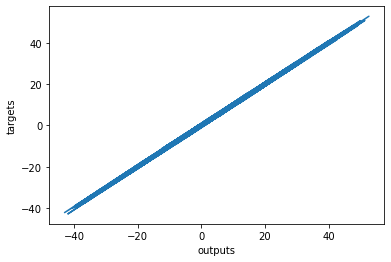

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()